<a href="https://colab.research.google.com/github/vesv/stenden_personal_code_examples/blob/main/Veselin_Velchev_Classification_Titanic_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing libraries

In [ ]:
titanic_data=pd.read_csv('Titanic_coursework_entire_dataset_23-24.csv')
#Loading the dataset
len(titanic_data)

890

In [ ]:
titanic_data.head()
#Viewing the dataset's top rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
titanic_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survival'],
      dtype='object')

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       888 non-null    float64
 2   Name         890 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     888 non-null    object 
 10  Survival     890 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 76.6+ KB


In [ ]:
titanic_data.dtypes
#Viewing the data types for each category

PassengerId      int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survival         int64
dtype: object

In [ ]:
titanic_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,888.000000,714.000000,890.000000,890.000000,890.000000,890.000000
mean,445.500000,2.306306,29.699118,0.523596,0.382022,32.231521,0.384270
std,257.065167,0.836515,14.526497,1.103224,0.806409,49.714678,0.486696
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,20.125000,0.000000,0.000000,7.925000,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
#Understanding the dataset
#Survival, where 0=False, 1=True
#SibSp refers to the number of siblings/spouses on board
#Pclass refers to the class of ticket they have, which is one of the highest contributing factors to their survival
#Sex and age are self explanatory
#Parch refers to the amount of parents / children on board
#Embarked refers to the port of embarkation for the passenger.
#Q = Queenstown, C = Cherbourg, S = Southampton
#Ticket refers to the ticket number they had
#Fare refers to how much they paid for the journey

# Analysing the Data

<Axes: xlabel='Survival', ylabel='count'>

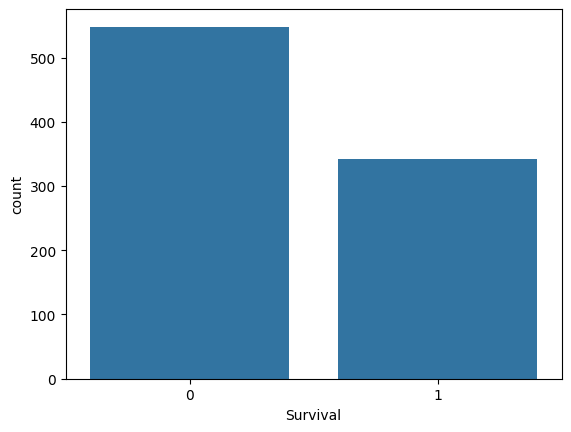

In [ ]:
#We use seaborn to visualise data
sns.countplot(x='Survival',data=titanic_data)

In [ ]:
#Only about a third of the people on board survived the catastrophe.

<Axes: xlabel='Survival', ylabel='count'>

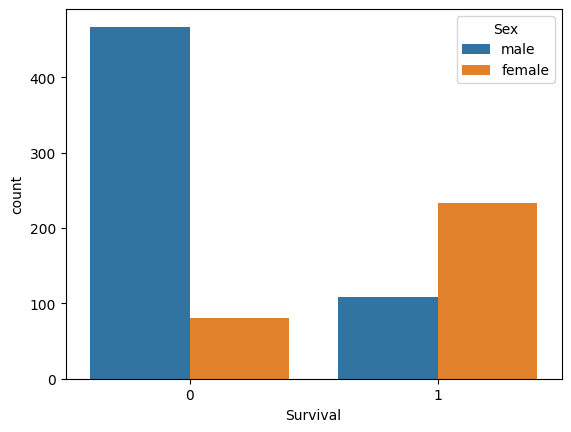

In [ ]:
sns.countplot(x='Survival',data=titanic_data,hue='Sex')

In [ ]:
#Interestingly, most of the people that died were male. Out of the survivor's group, most individuals are female.
#This could be attributed to the social norm "Women and Children First", where women and children get priority in evacuation scenarios.

In [ ]:
titanic_data.isna()
#Checking for null values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,True,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isna().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

In [ ]:
#Age has a disproportionate amount of null values.

<Axes: >

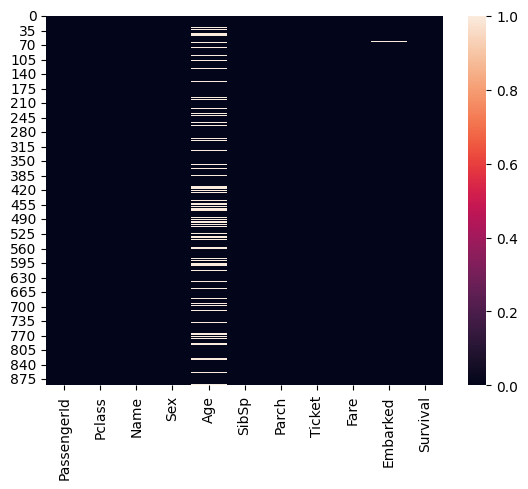

In [ ]:
sns.heatmap(titanic_data.isna())
#Visualising the null values

In [ ]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.775280898876403

In [ ]:
#Almost 20% of the Age column holds null values

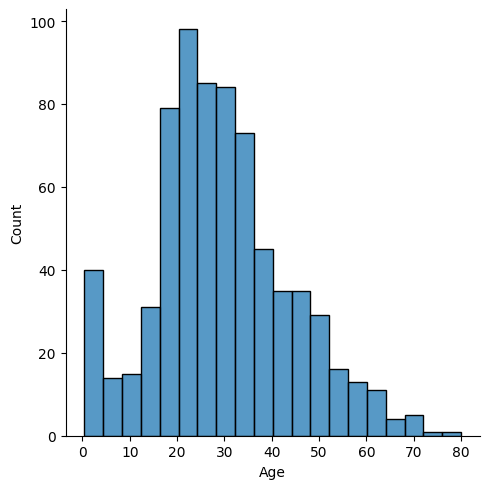

In [ ]:
sns.displot(x='Age',data=titanic_data)

In [ ]:
#Age distribution

# Data Cleaning

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
#We fill the missing age values using the mean of all ages.

In [ ]:
titanic_data['Age'].isna().sum()
#Verifying that there's no null data left.

0

<Axes: >

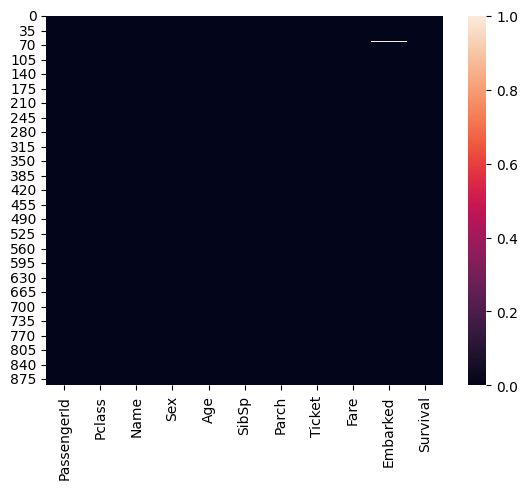

In [ ]:
sns.heatmap(titanic_data.isna())

In [ ]:
titanic_data.info()
#We still have a bunch of columns that are using non-numeric values.
#Also, we have columns that have data which isn't useful for prediction.
#Such as name, embarked and ticket.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       888 non-null    float64
 2   Name         890 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          890 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     888 non-null    object 
 10  Survival     890 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 76.6+ KB


In [ ]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender']=gender
titanic_data.head()
#We convert the Sex column to a new column, Gender, where males are stored as 1, and females as 0.
#This makes it usable for our models.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Gender
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [ ]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic_data.head()
#We drop the columns that serve no purpose to the models.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival,Gender
0,1,3.0,22.0,1,0,7.2500,0,1
1,2,1.0,38.0,1,0,71.2833,1,0
2,3,3.0,26.0,0,0,7.9250,1,0
3,4,1.0,35.0,1,0,53.1000,1,0
4,5,3.0,35.0,0,0,8.0500,0,1


In [ ]:
numerical_features = titanic_data.select_dtypes(include=['int', 'float']).columns
for feature in numerical_features:
    titanic_data[feature].fillna(titanic_data[feature].median(), inplace=True)

In [ ]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survival']
#We seperate the variables that we will use for training as X
#We use y as the target value.

In [ ]:
from sklearn.model_selection import train_test_split
#We import the train_test_split method

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#We use 20% of the dataset for testing.

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Importing the first model, Logicstic Regression

In [ ]:
print(titanic_data.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Survival       0
Gender         0
dtype: int64


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
#We fit the dataset to our Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict=lr.predict(x_test)

# Testing

In [ ]:
from sklearn.metrics import confusion_matrix
#Import confusion matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,93,11
Actual Yes,20,54


from matplotlib import pyplot as plt
_df_7['Predicted No'].plot(kind='hist', bins=20, title='Predicted No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Predicted Yes'].plot(kind='hist', bins=20, title='Predicted Yes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Predicted No', y='Predicted Yes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Predicted Yes']
  ys = series['Predicted No']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Predicted Yes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Yes')
_ = plt.ylabel('Predicted No')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Predicted Yes']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Predicted Yes'}, axis=1)
              .sort_values('Predicted Yes', ascending=True))
  xs = counted['Predicted Yes']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Predicted Yes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Yes')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['Predicted No'].plot(kind='line', figsize=(8, 4), title='Predicted No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Predicted Yes'].plot(kind='line', figsize=(8, 4), title='Predicted Yes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       104
           1       0.83      0.73      0.78        74

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.82       178



In [ ]:
#Overall, Logistic Regression is decent but the results are affected by the dropped data.

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

predict=dtree.predict(x_test)

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       104
           1       0.73      0.73      0.73        74

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



# SVM

In [ ]:
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly']
for i in kernel:
  model=SVC(kernel=i, C=1.0)
  model.fit(x_train, y_train)
  print('For kernel:', i)
  print('Accuracy is:', model.score(x_test, y_test))


For kernel: linear
Accuracy is: 0.8258426966292135
For kernel: rbf
Accuracy is: 0.6235955056179775
For kernel: poly
Accuracy is: 0.6292134831460674
